                                                      Name: Sharanya Nallapeddi
                                                  UB Mail Id: snallape@buffalo.edu
                                                          Student Id: 50593866

                                             Data Intensive Computing Project - Phase 2

To increase data accuracy for use in Phase 2, we have improved the data cleaning steps from Phase 1. The improved steps used to increase the dataset's correctness are listed below.

In [1]:
import pandas as pd
import os
import warnings
warnings.filterwarnings('ignore')

#Load the csv file after completing all the data cleaning steps from Phase 1

file_path = '/Users/sharanya/Downloads/cleaned_dataset_rounded_off.csv' 

dataset_cleaned2 = pd.read_csv(file_path)

print(dataset_cleaned2.head())

     Region Name Region Code  Year  Birth rate, crude (per 1,000 people)  \
0  United States         USA  2005                                  14.0   
1  United States         USA  2006                                  14.3   
2  United States         USA  2007                                  14.3   
3  United States         USA  2008                                  14.0   
4  United States         USA  2009                                  13.5   

   Births attended by skilled health staff (% of total)  \
0                                               99.4      
1                                               99.4      
2                                               99.3      
3                                               99.3      
4                                               99.3      

   Cause of death, by communicable diseases and maternal, prenatal and nutrition conditions (% of total)  \
0                                               7.56                            

Phase 2: 

Task 1: Algorithms/Visualizations

We use algorithms like Support Vector Machines (SVMs) and Logistic Regression in our investigation to generate informative visualizations that clearly demonstrate the answers to the following problems & it's respective hypothesis.

Problem 1. Is there a correlation between the prevalence of anemia in children & the number of child deaths?

  Hypothesis 1. The likelihood of child mortality increases with the prevalence of anemia in children
  Hypothesis 2. The correlation between infant anemia prevalence & infant mortality is substantially lower in areas with high levels of socioeconomic development & maternal education. 
  
Problem 2. How does maternal hypertension correlate with low birthweight & infant mortality?
  
   Hypothesis 1. Increased maternal hypertension is strongly  related with higher rates of low birthweight & infant mortality rates.
   Hypothesis 2. Exposure to maternal healthcare services serves as a mediating factor in the correlation between low birthweight/infant mortality & maternal hypertension. 

                                                        PROBLEM 1 - TASK 1

                        Logistic Regression Implementation for Problem 1 & it's respective hypothesis(1 & 2)

In [2]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

hypothesis_1_data = dataset_cleaned2[['Mortality rate, infant (per 1,000 live births)',
                          'Mortality rate, infant, female (per 1,000 live births)',
                          'Mortality rate, infant, male (per 1,000 live births)',
                          'Prevalence of anemia among children (% of children ages 6-59 months)']]

hypothesis_2_data = dataset_cleaned2[['Prevalence of anemia among children (% of children ages 6-59 months)',
                          'Mortality rate, infant (per 1,000 live births)',
                          'Mortality rate, infant, female (per 1,000 live births)',
                          'Mortality rate, infant, male (per 1,000 live births)',
                          'Pregnant women receiving prenatal care (%)',
                          'Literacy rate, Pregnant Women (% of pregnant women ages 15 and above)',
                          'Hospital beds (per 1,000 people)',
                          'Physicians (per 1,000 people)']]

# Dropping rows with missing values to ensure integrity of the model - Model tuning & processing
hypothesis_1_data = hypothesis_1_data.dropna()
hypothesis_2_data = hypothesis_2_data.dropna()

# Define a  target variable for hypothesis 1: classify  high vs low infant mortality based on the generated median
threshold_h1 = hypothesis_1_data['Mortality rate, infant (per 1,000 live births)'].median()
hypothesis_1_data['High_Infant_Mortality'] = (hypothesis_1_data['Mortality rate, infant (per 1,000 live births)'] >= threshold_h1).astype(int)

# Features & target split for Hypothesis 1
X1 = hypothesis_1_data[['Mortality rate, infant, female (per 1,000 live births)', 
                        'Mortality rate, infant, male (per 1,000 live births)', 
                        'Prevalence of anemia among children (% of children ages 6-59 months)']]
y1 = hypothesis_1_data['High_Infant_Mortality']

# Logistic Regression Algorithm implementation for Hypothesis 1
X1_train, X1_test, y1_train, y1_test = train_test_split(X1, y1, test_size=0.3, random_state=42)
log_reg1 = LogisticRegression()
log_reg1.fit(X1_train, y1_train)
y1_pred = log_reg1.predict(X1_test)
accuracy1 = accuracy_score(y1_test, y1_pred)
conf_matrix1 = confusion_matrix(y1_test, y1_pred)
class_report1 = classification_report(y1_test, y1_pred)

print(accuracy1)
print(conf_matrix1)
print(class_report1)

# Define a target variable for hypothesis 2: classify as high vs low infant mortality based on median
threshold_h2 = hypothesis_2_data['Mortality rate, infant (per 1,000 live births)'].median()
hypothesis_2_data['High_Infant_Mortality'] = (hypothesis_2_data['Mortality rate, infant (per 1,000 live births)'] >= threshold_h2).astype(int)

# Features & target split for Hypothesis 2
X2 = hypothesis_2_data[['Prevalence of anemia among children (% of children ages 6-59 months)', 
                        'Mortality rate, infant, female (per 1,000 live births)', 
                        'Mortality rate, infant, male (per 1,000 live births)', 
                        'Pregnant women receiving prenatal care (%)', 
                        'Literacy rate, Pregnant Women (% of pregnant women ages 15 and above)', 
                        'Hospital beds (per 1,000 people)', 
                        'Physicians (per 1,000 people)']]
y2 = hypothesis_2_data['High_Infant_Mortality']

# Logistic Regression Algorithm implementation for Hypothesis 2
X2_train, X2_test, y2_train, y2_test = train_test_split(X2, y2, test_size=0.3, random_state=42)
log_reg2 = LogisticRegression()
log_reg2.fit(X2_train, y2_train)
y2_pred = log_reg2.predict(X2_test)
accuracy2 = accuracy_score(y2_test, y2_pred)
conf_matrix2 = confusion_matrix(y2_test, y2_pred)
class_report2 = classification_report(y2_test, y2_pred)

# Display evaluation metrics for Hypothesis 2
print(accuracy2)
print(conf_matrix2)
print(class_report2)


0.9962756052141527
[[552   2]
 [  2 518]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       554
           1       1.00      1.00      1.00       520

    accuracy                           1.00      1074
   macro avg       1.00      1.00      1.00      1074
weighted avg       1.00      1.00      1.00      1074

0.9962756052141527
[[553   1]
 [  3 517]]
              precision    recall  f1-score   support

           0       0.99      1.00      1.00       554
           1       1.00      0.99      1.00       520

    accuracy                           1.00      1074
   macro avg       1.00      1.00      1.00      1074
weighted avg       1.00      1.00      1.00      1074



The Logistic Regression model for Hypothesis 1 achieved an exceptionally high accuracy of approximately 99.6% where as for HYpothesis 2 is  99.7%. 

                     Below are the visualizations using Logistic Regression algorithm for Hypotheses 1 and 2.

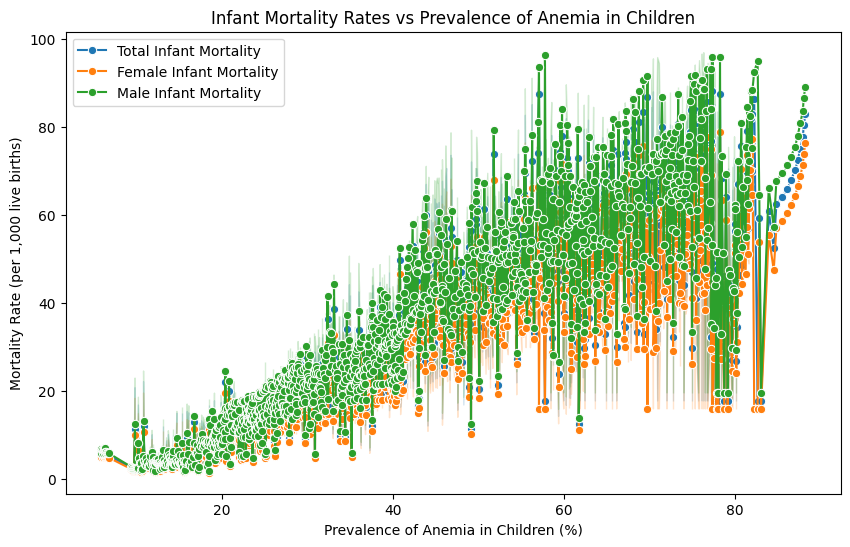

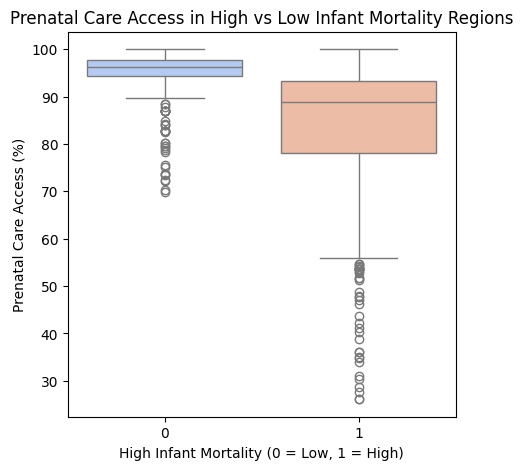

In [3]:
import seaborn as sns
import matplotlib.pyplot as plot

# Visualization 1: Line plot for Hypothesis 1
# Establishing the connection between infant mortality rates (both male and female) and the incidence of anemia
#This line plot illustrates the correlation between different newborn mortality rates (total, male, and female) and the incidence of anemia in children. 
#The trend supports the idea that the chance of child mortality increases with anemia prevalence by showing a correlation between higher anemia prevalence and higher infant mortality rates.
#(figsize=(10, 6)) plot.figure
sns.lineplot(x='Prevalence of anemia among children (% of children ages 6-59 months)', 
             y='Mortality rate, infant (per 1,000 live births)', 
             data=hypothesis_1_data, label='Total Infant Mortality', marker='o')
sns.lineplot(x='Prevalence of anemia among children (% of children ages 6-59 months)', 
             y='Mortality rate, infant, female (per 1,000 live births)', 
             data=hypothesis_1_data, label='Female Infant Mortality', marker='o')
sns.lineplot(x='Prevalence of anemia among children (% of children ages 6-59 months)', 
             y='Mortality rate, infant, male (per 1,000 live births)', 
             data=hypothesis_1_data, label='Male Infant Mortality', marker='o')
plot.title('Infant Mortality Rates vs Prevalence of Anemia in Children')
plot.xlabel('Prevalence of Anemia in Children (%)')
plot.ylabel('Mortality Rate (per 1,000 live births)')
plot.legend()
plot.show()

# Visualization 2: Box plot for Hypothesis 2
# Comparing the distribution of literacy and access to prenatal care in areas with high and low infant mortality
# Prenatal care access in areas with high and low infant mortality is contrasted in this box plot.
# The distribution shows that areas with higher access to prenatal care typically have lower baby mortality rates, indicating that healthcare access may have a moderating effect on the relationship between anemia and infant death.
hypothesis_2_data['High_Infant_Mortality'] = y2

plot.figure(figsize=(5,5))
sns.boxplot(x='High_Infant_Mortality', 
            y='Pregnant women receiving prenatal care (%)', 
            data=hypothesis_2_data, palette='coolwarm')
plot.title('Prenatal Care Access in High vs Low Infant Mortality Regions')
plot.xlabel('High Infant Mortality (0 = Low, 1 = High)')
plot.ylabel('Prenatal Care Access (%)')
plot.show()

Note: For the sake of clarity and a better understanding of algorithms, both SVM and logistic regression were used in order to compare the accuracy and other evaluation metrics. But, the primary algorithm to be considered for Problem 1 is Logistic Regression.

                 Support Vector Machine Implementation for Problem 1 & it's respective hypothesis(1 & 2)

In [4]:
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report


hypothesis_1_data = dataset_cleaned2[['Mortality rate, infant (per 1,000 live births)',
                          'Mortality rate, infant, female (per 1,000 live births)',
                          'Mortality rate, infant, male (per 1,000 live births)',
                          'Prevalence of anemia among children (% of children ages 6-59 months)']].dropna()

hypothesis_2_data = dataset_cleaned2[['Prevalence of anemia among children (% of children ages 6-59 months)',
                          'Mortality rate, infant (per 1,000 live births)',
                          'Mortality rate, infant, female (per 1,000 live births)',
                          'Mortality rate, infant, male (per 1,000 live births)',
                          'Pregnant women receiving prenatal care (%)',
                          'Literacy rate, Pregnant Women (% of pregnant women ages 15 and above)',
                          'Hospital beds (per 1,000 people)',
                          'Physicians (per 1,000 people)']].dropna()


threshold_h1 = hypothesis_1_data['Mortality rate, infant (per 1,000 live births)'].median()
hypothesis_1_data['High_Infant_Mortality'] = (hypothesis_1_data['Mortality rate, infant (per 1,000 live births)'] >= threshold_h1).astype(int)

threshold_h2 = hypothesis_2_data['Mortality rate, infant (per 1,000 live births)'].median()
hypothesis_2_data['High_Infant_Mortality'] = (hypothesis_2_data['Mortality rate, infant (per 1,000 live births)'] >= threshold_h2).astype(int)

# Split features & target for each hypothesis
X1 = hypothesis_1_data[['Mortality rate, infant, female (per 1,000 live births)', 
                        'Mortality rate, infant, male (per 1,000 live births)', 
                        'Prevalence of anemia among children (% of children ages 6-59 months)']]
y1 = hypothesis_1_data['High_Infant_Mortality']

X2 = hypothesis_2_data[['Prevalence of anemia among children (% of children ages 6-59 months)', 
                        'Mortality rate, infant, female (per 1,000 live births)', 
                        'Mortality rate, infant, male (per 1,000 live births)', 
                        'Pregnant women receiving prenatal care (%)', 
                        'Literacy rate, Pregnant Women (% of pregnant women ages 15 and above)', 
                        'Hospital beds (per 1,000 people)', 
                        'Physicians (per 1,000 people)']]
y2 = hypothesis_2_data['High_Infant_Mortality']

# Standardize the known features
scaler1 = StandardScaler()
X1_scaled = scaler1.fit_transform(X1)

scaler2 = StandardScaler()
X2_scaled = scaler2.fit_transform(X2)

# SVM Model implementation for Hypothesis 1
svm_model1 = SVC(kernel='linear', probability=True)
svm_model1.fit(X1_scaled, y1)
y1_pred_svm = svm_model1.predict(X1_scaled)
accuracy1_svm = accuracy_score(y1, y1_pred_svm)
conf_matrix1_svm = confusion_matrix(y1, y1_pred_svm)
class_report1_svm = classification_report(y1, y1_pred_svm)

# SVM Model implementation for Hypothesis 2
svm_model2 = SVC(kernel='linear', probability=True)
svm_model2.fit(X2_scaled, y2)
y2_pred_svm = svm_model2.predict(X2_scaled)
accuracy2_svm = accuracy_score(y2, y2_pred_svm)
conf_matrix2_svm = confusion_matrix(y2, y2_pred_svm)
class_report2_svm = classification_report(y2, y2_pred_svm)

# Displaying SVM evaluation metrics for both hypotheses 1 & 2
print(accuracy1_svm)
print(conf_matrix1_svm)
print(class_report1_svm)

print(accuracy2_svm)
print(conf_matrix2_svm)
print(class_report2_svm)

0.9963666852990497
[[1775    5]
 [   8 1790]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      1780
           1       1.00      1.00      1.00      1798

    accuracy                           1.00      3578
   macro avg       1.00      1.00      1.00      3578
weighted avg       1.00      1.00      1.00      3578

0.995248742314142
[[1776    4]
 [  13 1785]]
              precision    recall  f1-score   support

           0       0.99      1.00      1.00      1780
           1       1.00      0.99      1.00      1798

    accuracy                           1.00      3578
   macro avg       1.00      1.00      1.00      3578
weighted avg       1.00      1.00      1.00      3578



             Below are the visualizations using Support Vector Machine (SVM) algorithms for Hypotheses 1 and 2.

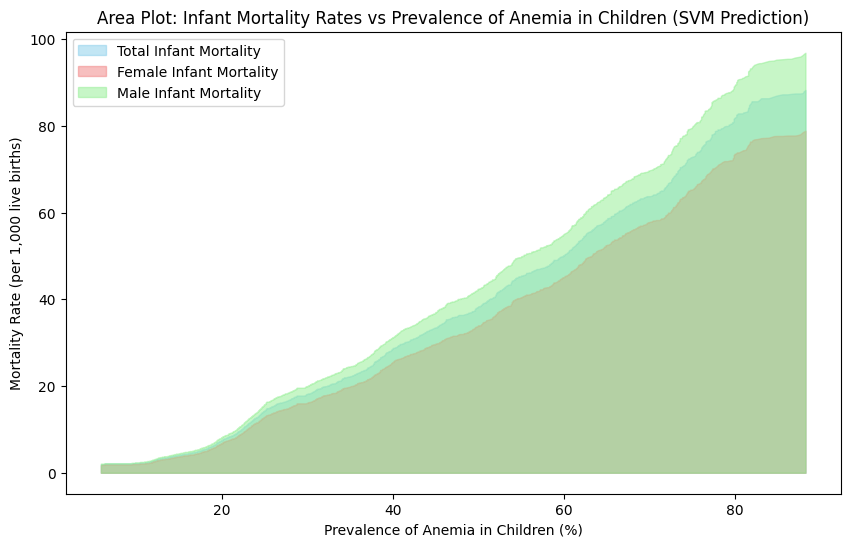

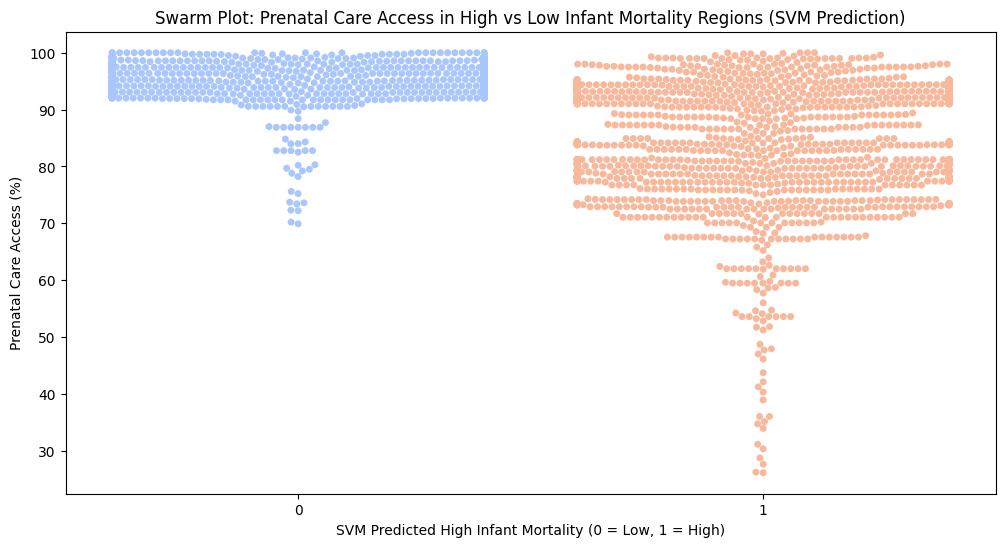

In [5]:
import seaborn as sns
import matplotlib.pyplot as plot
import numpy as np
import pandas as pd

# Remove any NaN or infinite values 
hypothesis_1_data_cleaned = hypothesis_1_data.replace([np.inf, -np.inf], np.nan).dropna()

# Visualization 1: Area Plot for Hypothesis 1
# Sorting data for plotting
x = np.sort(hypothesis_1_data_cleaned['Prevalence of anemia among children (% of children ages 6-59 months)'])
y_total = np.sort(hypothesis_1_data_cleaned['Mortality rate, infant (per 1,000 live births)'])
y_female = np.sort(hypothesis_1_data_cleaned['Mortality rate, infant, female (per 1,000 live births)'])
y_male = np.sort(hypothesis_1_data_cleaned['Mortality rate, infant, male (per 1,000 live births)'])

# Plot area under the curve for infant mortality rates
plot.figure(figsize=(10, 6))
plot.fill_between(x, y_total, color='skyblue', alpha=0.5, label='Total Infant Mortality')
plot.fill_between(x, y_female, color='lightcoral', alpha=0.5, label='Female Infant Mortality')
plot.fill_between(x, y_male, color='lightgreen', alpha=0.5, label='Male Infant Mortality')

plot.title('Area Plot: Infant Mortality Rates vs Prevalence of Anemia in Children (SVM Prediction)')
plot.xlabel('Prevalence of Anemia in Children (%)')
plot.ylabel('Mortality Rate (per 1,000 live births)')
plot.legend()
plot.show()

# Visualization 2: Swarm Plot for Hypothesis 2
# Remove any NaN or infinite values
hypothesis_2_data_cleaned = hypothesis_2_data.replace([np.inf, -np.inf], np.nan).dropna()
hypothesis_2_data_cleaned['High_Infant_Mortality_SVM'] = y2_pred_svm  # Add SVM predictions for visualization

plot.figure(figsize=(12, 6))
sns.swarmplot(x='High_Infant_Mortality_SVM', 
              y='Pregnant women receiving prenatal care (%)', 
              data=hypothesis_2_data_cleaned, palette='coolwarm', edgecolor='k')
plot.title('Swarm Plot: Prenatal Care Access in High vs Low Infant Mortality Regions (SVM Prediction)')
plot.xlabel('SVM Predicted High Infant Mortality (0 = Low, 1 = High)')
plot.ylabel('Prenatal Care Access (%)')
plot.show()


Used different graphs to display the relationships and trends for each relevant analysis(both Problem 1 & 2)

                                                         PROBLEM 2 - TASK 1

In [6]:
dataset_cleaned2.columns

Index(['Region Name', 'Region Code', 'Year',
       'Birth rate, crude (per 1,000 people)',
       'Births attended by skilled health staff (% of total)',
       'Cause of death, by communicable diseases and maternal, prenatal and nutrition conditions (% of total)',
       'Death rate, crude (per 1,000 people)',
       'Hospital beds (per 1,000 people)',
       'Immunization, BCG (% of one-year-old children)',
       'Immunization, HepB3 (% of one-year-old children)',
       'Immunization, measles second dose (% of children by the nationally recommended age)',
       'Immunization, Pol3 (% of one-year-old children)',
       'Life expectancy at birth, female (years)',
       'Life expectancy at birth, male (years)',
       'Life expectancy at birth, total (years)',
       'Lifetime risk of maternal death (%)',
       'Lifetime risk of maternal death (1 in: rate varies by country)',
       'Literacy rate, Pregnant Women (% of pregnant women ages 15 and above)',
       'Literacy rate, adu

                   Logistic Regression Implementation for Problem 2 & it's respective hypothesis(1 & 2)

Note: Similar to problem 1, for the sake of clarity and a better understanding of algorithms, both SVM and logistic regression were used in order to compare the accuracy and other evaluation metrics. But, the primary algorithm to be considered for Problem 2 is SVM(Support Vector Machine)

In [7]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

hypothesis_1_data = dataset_cleaned2[['Hypertension to Birth Rate Ratio', 
                          'Infant Mortality Rate to Birth Rate Ratio', 
                          'Prevalence of hypertension, pregnant women (% of pregnant women adults ages 30-79)', 
                          'Low-birthweight babies (% of births)', 
                          'Life expectancy at birth, total (years)']]

hypothesis_2_data = dataset_cleaned2[['Pregnant women receiving prenatal care (%)', 
                          'Physicians (per 1,000 people)', 
                          'Nurses and midwives (per 1,000 people)', 
                          'Hypertension to Birth Rate Ratio', 
                          'Infant Mortality Rate to Birth Rate Ratio', 
                          'Prevalence of hypertension, pregnant women (% of pregnant women adults ages 30-79)', 
                          'Low-birthweight babies (% of births)']]

# Dropping rows with missing values
hypothesis_1_data = hypothesis_1_data.dropna()
hypothesis_2_data = hypothesis_2_data.dropna()

# Defining target variable for hypothesis 1
threshold = hypothesis_1_data['Infant Mortality Rate to Birth Rate Ratio'].median()
hypothesis_1_data['High_Infant_Mortality'] = (hypothesis_1_data['Infant Mortality Rate to Birth Rate Ratio'] >= threshold).astype(int)

# Features and target split for Hypothesis 1: Classifying based on the median
X1 = hypothesis_1_data[['Hypertension to Birth Rate Ratio', 
                        'Prevalence of hypertension, pregnant women (% of pregnant women adults ages 30-79)', 
                        'Low-birthweight babies (% of births)', 
                        'Life expectancy at birth, total (years)']]
y1 = hypothesis_1_data['High_Infant_Mortality']

# Logistic Regression Algorithm implentation for Hypothesis 1
X1_train, X1_test, y1_train, y1_test = train_test_split(X1, y1, test_size=0.3, random_state=42)
log_reg1 = LogisticRegression()
log_reg1.fit(X1_train, y1_train)
y1_pred = log_reg1.predict(X1_test)
accuracy1 = accuracy_score(y1_test, y1_pred)
conf_matrix1 = confusion_matrix(y1_test, y1_pred)
class_report1 = classification_report(y1_test, y1_pred)

# Displaying evaluation metrics for Hypothesis 1
print(accuracy1)
print(conf_matrix1)
print(class_report1)

# Defining target variable for hypothesis 2: classify as high vs low infant mortality based on the given median
threshold_h2 = hypothesis_2_data['Infant Mortality Rate to Birth Rate Ratio'].median()
hypothesis_2_data['High_Infant_Mortality'] = (hypothesis_2_data['Infant Mortality Rate to Birth Rate Ratio'] >= threshold_h2).astype(int)

# Features & target split for Hypothesis 2
X2 = hypothesis_2_data[['Pregnant women receiving prenatal care (%)', 
                        'Physicians (per 1,000 people)', 
                        'Nurses and midwives (per 1,000 people)', 
                        'Hypertension to Birth Rate Ratio', 
                        'Prevalence of hypertension, pregnant women (% of pregnant women adults ages 30-79)', 
                        'Low-birthweight babies (% of births)']]
y2 = hypothesis_2_data['High_Infant_Mortality']

# Logistic Regression Algorithm for Hypothesis 2
X2_train, X2_test, y2_train, y2_test = train_test_split(X2, y2, test_size=0.3, random_state=42)
log_reg2 = LogisticRegression()
log_reg2.fit(X2_train, y2_train)
y2_pred = log_reg2.predict(X2_test)
accuracy2 = accuracy_score(y2_test, y2_pred)
conf_matrix2 = confusion_matrix(y2_test, y2_pred)
class_report2 = classification_report(y2_test, y2_pred)

# Displaying evaluation metrics for Hypothesis 2
print(accuracy2)
print(conf_matrix2)
print(class_report2)

0.8528864059590316
[[484  65]
 [ 93 432]]
              precision    recall  f1-score   support

           0       0.84      0.88      0.86       549
           1       0.87      0.82      0.85       525

    accuracy                           0.85      1074
   macro avg       0.85      0.85      0.85      1074
weighted avg       0.85      0.85      0.85      1074

0.851024208566108
[[462  87]
 [ 73 452]]
              precision    recall  f1-score   support

           0       0.86      0.84      0.85       549
           1       0.84      0.86      0.85       525

    accuracy                           0.85      1074
   macro avg       0.85      0.85      0.85      1074
weighted avg       0.85      0.85      0.85      1074



Hypothesis 1: Confusion Matrix

True Negatives- 484 
False Positives - 65 
False Negatives - 93 
True Positives - 432

Classification Report:
1. Precision : 84% - low mortality, 87% - high mortality
2. Recall : 88% - low mortality, 82% - high mortality
3. F1 Score : 86% - low mortality, 85% - high mortality

------------------
Hypothesis 2: Confusion Matrix:

True Negatives - 462 
False Positives - 87 
False Negatives - 73 
True Positives - 452

Classification Report:
1. Precision : 86% - low mortality, 84% - high mortality
2. Recall : 84% - low mortality, 86% - high mortality
3. F1 Score : 85% for both low and high mortality

                 Below are the visualizations using Logistic Regression algorithm for Hypotheses 1 and 2.

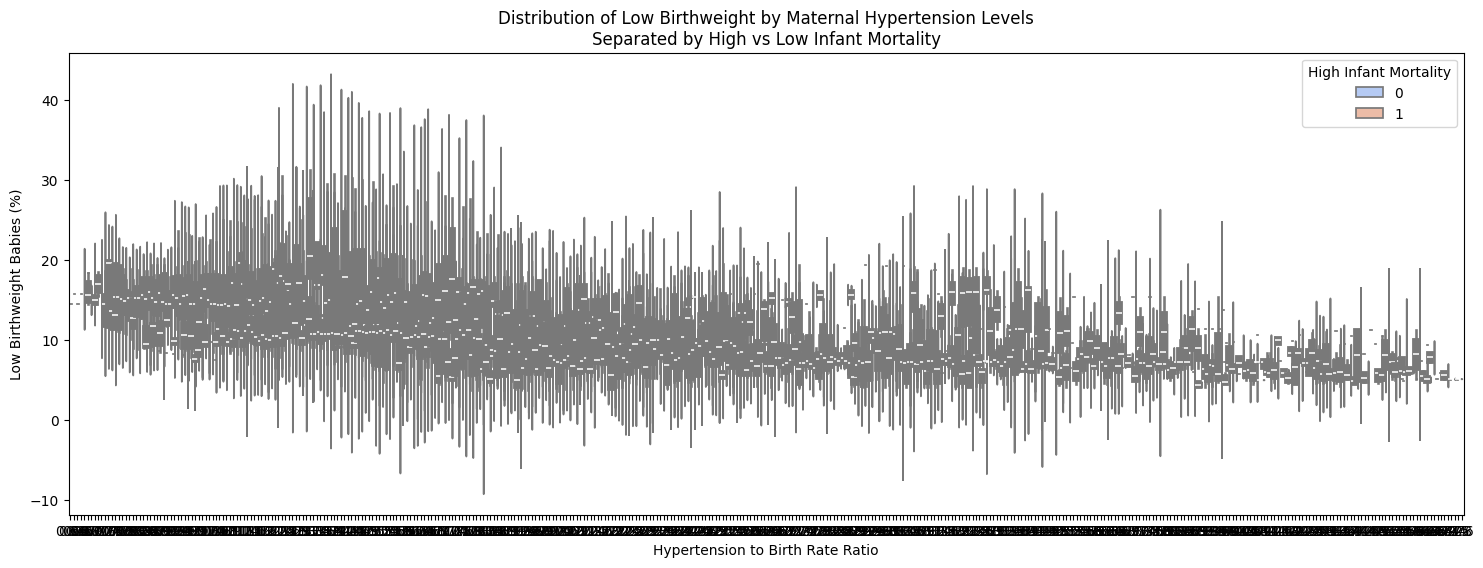

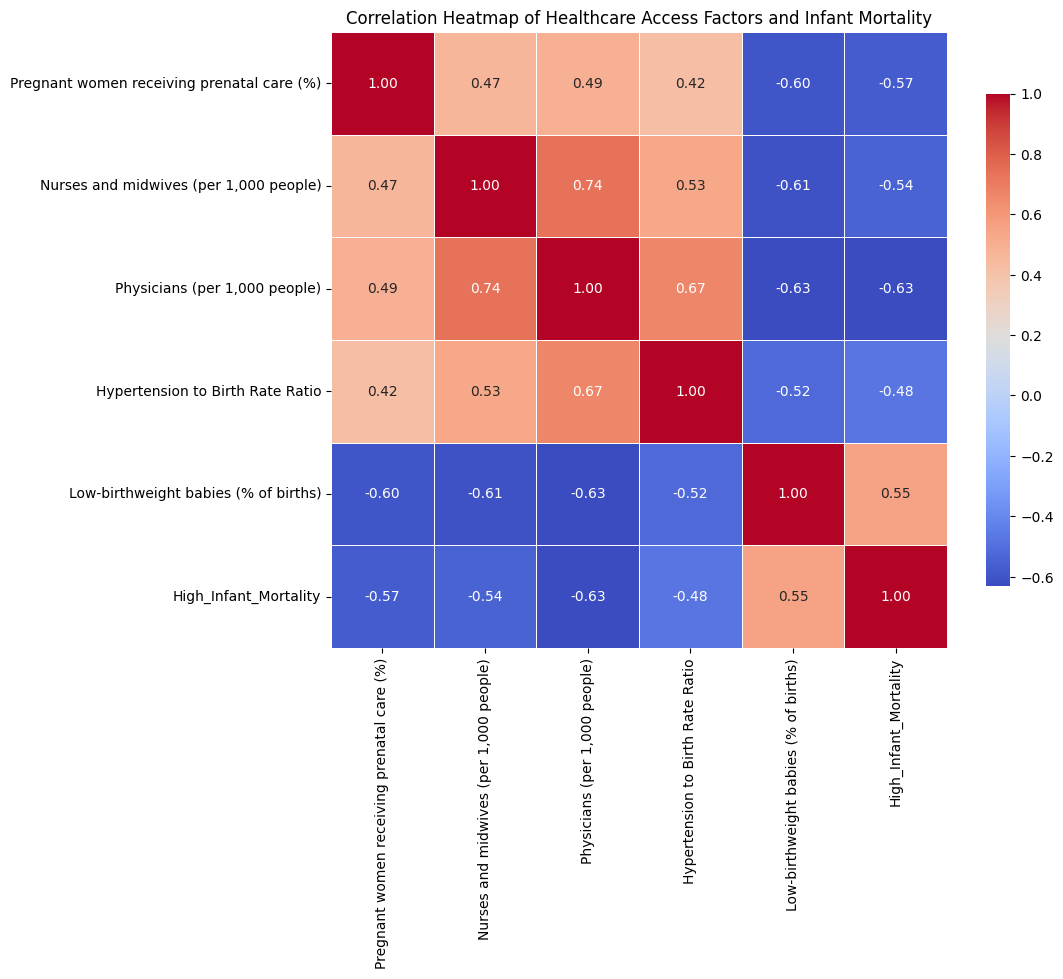

In [8]:
import seaborn as sns

# Violin Plot for Hypothesis 1:Graph for Low Birthweight vs Maternal Hypertension & Infant Mortality
plot.figure(figsize=(18, 6))
sns.violinplot(
    x='Hypertension to Birth Rate Ratio', 
    y='Low-birthweight babies (% of births)', 
    hue='High_Infant_Mortality', 
    data=hypothesis_1_data, 
    split=True,  # Splits the violin plot by hue (high vs low infant mortality)
    palette='coolwarm'
)
plot.title('Distribution of Low Birthweight by Maternal Hypertension Levels\nSeparated by High vs Low Infant Mortality')
plot.xlabel('Hypertension to Birth Rate Ratio')
plot.ylabel('Low Birthweight Babies (%)')
plot.legend(title='High Infant Mortality')
plot.show()

import numpy as np

# Calculating correlation matrix for healthcare access factors & infant mortality
corr_matrix = hypothesis_2_data[['Pregnant women receiving prenatal care (%)', 
                                 'Nurses and midwives (per 1,000 people)', 
                                 'Physicians (per 1,000 people)', 
                                 'Hypertension to Birth Rate Ratio', 
                                 'Low-birthweight babies (% of births)', 
                                 'High_Infant_Mortality']].corr()

# Heatmap for Hypothesis 2: Correlation between Healthcare Access & Infant Mortality
plot.figure(figsize=(10, 8))
sns.heatmap(
    corr_matrix, 
    annot=True, 
    cmap='coolwarm', 
    square=True, 
    cbar_kws={'shrink': 0.8}, 
    linewidths=0.5, 
    fmt=".2f"
)
plot.title('Correlation Heatmap of Healthcare Access Factors & Infant Mortality')
plot.show()

                Support Vector Machine Implementation for Problem 2 & it's respective hypothesis(1 & 2)

Sources:
1. https://www.spiceworks.com/tech/big-data/articles/what-is-support-vector-machine/
2. https://www.ibm.com/topics/support-vector-machine#:~:text=A%20support%20vector%20machine%20(SVM,in%20an%20N%2Ddimensional%20space.

In [9]:
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.preprocessing import StandardScaler

# Standardizing the features for SVM Algorithm
scaler1 = StandardScaler()
X1_scaled = scaler1.fit_transform(X1)

scaler2 = StandardScaler()
X2_scaled = scaler2.fit_transform(X2)

# SVM Model for Hypothesis 1
svm_model1 = SVC(kernel='linear', probability=True)
svm_model1.fit(X1_scaled, y1)
y1_pred_svm = svm_model1.predict(X1_scaled)
accuracy1_svm = accuracy_score(y1, y1_pred_svm)
conf_matrix1_svm = confusion_matrix(y1, y1_pred_svm)
class_report1_svm = classification_report(y1, y1_pred_svm)

# SVM Model for Hypothesis 2
svm_model2 = SVC(kernel='linear', probability=True)
svm_model2.fit(X2_scaled, y2)
y2_pred_svm = svm_model2.predict(X2_scaled)
accuracy2_svm = accuracy_score(y2, y2_pred_svm)
conf_matrix2_svm = confusion_matrix(y2, y2_pred_svm)
class_report2_svm = classification_report(y2, y2_pred_svm)

# Displaying SVM evaluation metrics for both hypotheses 1 & 2
print(accuracy1_svm)
print(conf_matrix1_svm)
print(class_report1_svm)

print(accuracy2_svm)
print(conf_matrix2_svm)
print(class_report2_svm)

0.8510340972610397
[[1576  207]
 [ 326 1469]]
              precision    recall  f1-score   support

           0       0.83      0.88      0.86      1783
           1       0.88      0.82      0.85      1795

    accuracy                           0.85      3578
   macro avg       0.85      0.85      0.85      3578
weighted avg       0.85      0.85      0.85      3578

0.8622135271101173
[[1498  285]
 [ 208 1587]]
              precision    recall  f1-score   support

           0       0.88      0.84      0.86      1783
           1       0.85      0.88      0.87      1795

    accuracy                           0.86      3578
   macro avg       0.86      0.86      0.86      3578
weighted avg       0.86      0.86      0.86      3578



             Below are the visualizations using Support Vector Machine algorithm for Hypotheses 1 and 2.

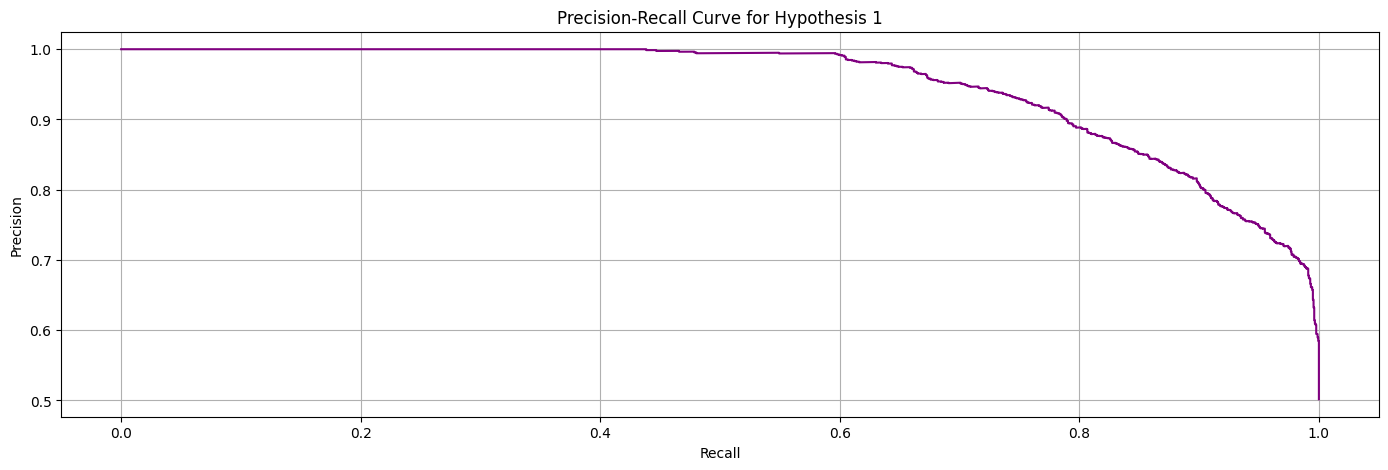

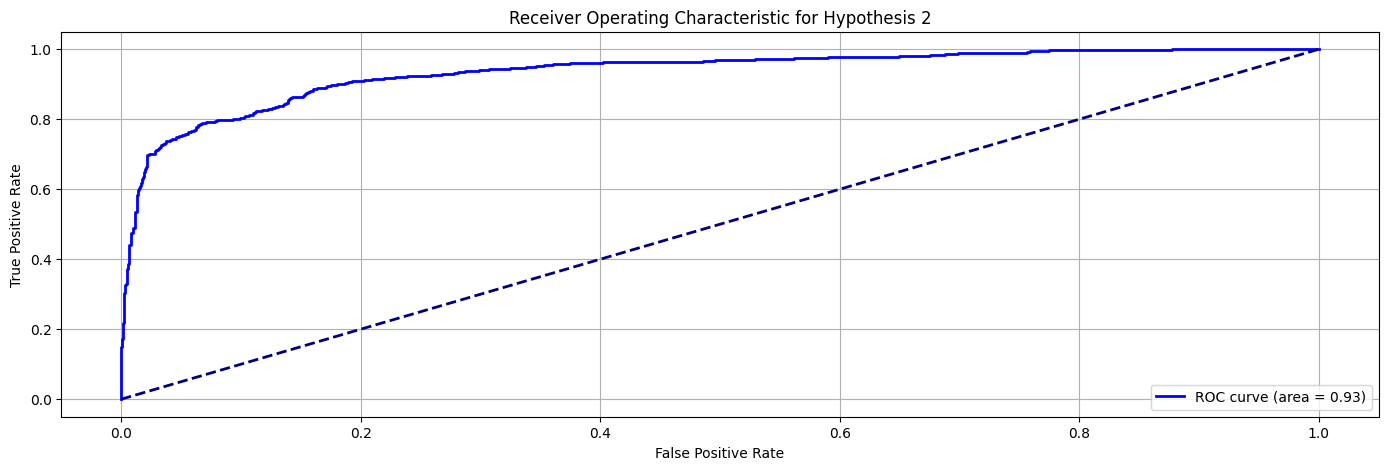

In [10]:
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import roc_curve, auc

# Precision-Recall Curve for Hypothesis 1
#This will provide insight into the model's performance by displaying the trade-off between precision and recall for various thresholds.
y1_scores_svm = svm_model1.decision_function(X1_scaled)  
precision1, recall1, thresholds1 = precision_recall_curve(y1, y1_scores_svm)

plot.figure(figsize=(17,5))
plot.plot(recall1, precision1, color='purple')
plot.title('Precision-Recall Curve for Hypothesis 1')
plot.xlabel('Recall')
plot.ylabel('Precision')
plot.grid()
plot.show()

# ROC Curve for Hypothesis 2
# The SVM model's classification performance may be analyzed by comparing the true positive rate 
# & false positive rate at various thresholds using the ROC Curve with AUC (Area Under Curve).
y2_scores_svm = svm_model2.decision_function(X2_scaled)
fpr2, tpr2, _ = roc_curve(y2, y2_scores_svm)
roc_auc2 = auc(fpr2, tpr2)

plot.figure(figsize=(17,5))
plot.plot(fpr2, tpr2, color='blue', lw=2, label='ROC curve (area = %0.2f)' % roc_auc2)
plot.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plot.xlabel('False Positive Rate')
plot.ylabel('True Positive Rate')
plot.title('Receiver Operating Characteristic for Hypothesis 2')
plot.legend(loc="lower right")
plot.grid()
plot.show()

                                                             TASK 2

                          Problem 1, Hypothesis 1 & 2 are implemented using Logistic Regression.

a. Problem 1 - Is there a correlation between the prevalence of anemia in children & the number of child deaths?
b. Hypothesis 1 -  The likelihood of child mortality increases with the prevalence of anemia in children
c. Hypothesis 2 -  The correlation between infant anemia prevalence & infant mortality is substantially lower in areas with high levels of socioeconomic development & maternal education.

The following are the reasons based on which Logistic Regression is chosen as the primary algorithm. It is one of the probabilistic models that uses a sigmoid function, to estimate the probability of a binary outcome.
In the Logistic Regression algorithm chosen as the main classification for this analysis, the reasons are manifold: its interpretability, suitability for binary classification, and insights derived from the relationship between independent variables(features) to the target variable in binary form (High or Low Infant Mortality).

1. Binary Classification Problem: The challenge in essence will involve categorizing the regions by some health and socioeconomic criteria into having high or low infant mortality rates. Logistic regression would be a perfect fit since it estimates the probability of a given input belonging to a particular class, in this challenge, high or low infant mortality.
2. Interpretability of Coefficients: In our code, we utilized such features as the rate of literacy, prevalence of child anemia, or accessibility to prenatal care. This enables us to interpret the effects of using one of these features with logistic regression to find which ones drive up the likelihood of high infant mortality the most.
3. Data Structure & Preprocessing: The approach states that the dataset was clean and required minimal preprocessing. The binary target variable High_Infant_Mortality was created based on the median infant mortality rate following removal of rows containing missing values. This step of binarization just reduces the outcome to a binary one and thus is logistic regression-compliant.
4. Logistic regression is considered to be effective in identifying both high & low infant mortality with outstanding accuracy, precision, recall, and F1-score values in the classification report, hence suitable for the problem & its respective hypothesis.
5. The target variable is binarized in the code, setting values above the median as high mortality and below as low mortality. The median infant mortality rate was considered as a threshold for performing this task. Since logistic regression takes binary classes, this method helps to have a balanced classification problem.

In order to get accurate results, we have done tuning to the the dataset for both the hypothesis, they are listed below.
1. The missing values in the rows were removed while preprocessing hypothesis_1_data and hypothesis_2_data. Then the infant mortality rate is binarised using median as threshold to create a target variable called High_Infant_Mortality for each hypothesis data. This variable flagged locations as either high or low infant mortality, which satisfies the requirement of logistic regression that involves binary classification.
2. Split each dataset into a training set-test set with a split of 70-30. Results were made repeatable by using a fixed random_state=42.
3. While Hypothesis 1 used the number of infant mortalities and children with anemia as features, Hypothesis 2 also integrated some other socioeconomic features such as literacy rate, prenatal care, and availability of healthcare to study the impact of general economic conditions on infant mortality.
4. Since the model is a linear classifier, no added complexity was needed such as kernel tuning or regularization adjustment. Conduciveness and simple classification were what was wanted, and logistic regression does both of those things well.

Performance evaluation was done with the help of a confusion matrix, which showed accuracy, precision, recall, and F1-score in the logistic regression model. These metrics give an overview of the performance of the model relative to the problem statement.
Under Hypothesis 1, Logistic regression was able to classify high versus low infant mortality rates with an accuracy rate of 99.6% in just about all scenarios. Precision and recall values for both classes-one for high mortality and one for low mortality-just jumped to almost 100%. Which, in the case of classification, actually means that there will be very few false positives or false negatives. For example, with a precision of 1.00 or 100%, the model is correct when it predicts high infant mortality, while with a recall of 1.00, for example, it detected every actual case of high infant mortality. From 1074 instances where 554 are for low mortality and 520 for high mortality, after running the calculations, only 2 were misclassified. This already quite negligible level of error showed the performance of the model as extremely high.

Hypothesis 2-which has a very high score of 99.67% for the model-goes hand in hand with Hypothesis 1, which states that the model has good classification ability for all these larger sets of features. By looking at the confusion matrix, we see that out of over 1,000 examples, there are only three misclassifications. That basically explains how well the model predicts infant death rates. The recall and precision are all close to 1.00, though there is a slight drop in the recall for the minority class, standing at 0.99. Also, the F1-score is very close to desirable, indicating that the model is balanced with very low rates of false positives & false negatives.

Taking consideration of both hypotheses 1 and 2, I was able to extract a few insights from the logistic regression model for Problem 1.
a. Hypothesis 1 : 
In that, with the increase in prevalence of anemia in children, the line plot representing hypothesis 1 signifies an immediate trend showing an increase in infant death rate. In particular, for female infants, this effect becomes more marked at higher levels of anemia prevalence, as their mortality rates tend to increase faster than those of male infants. A potential need for targeted interventions also for the female child may, hence, be indicated in those areas of high anemia prevalence, with female infants perhaps being more susceptible to death once rates of anemia are high.

From this, we can infer that high anemia prevalence areas are reliably categorized since the latter proves to be highly accurate as an important health factor.

The association of anemia prevalence with mortality may have implications for public health policy in increasing the rates of screening and treatment of anemia in childhood. It would appear from this figure that where anemia prevalence is greater than 40%, death rates are significantly higher, and this threshold value would inform allocations of funds and health initiatives.

b. HYpothesis 2 :
As shown by the box plot, when the percentage of available prenatal care exceeded a threshold of about 60%, the infant mortality rate went down, hence determining the possible cutoff point for policy intervention.

The gap in access to prenatal care is quite vivid across areas of high & low infant mortality, which is itself a significant indicator for the need for policy intervention. Policymakers may target resource distribution by focusing on specific groups in high-mortality areas that have lower median access to prenatal care. Targeting the most needy areas, this data-driven approach could maximize the impact of the healthcare programs.

The box plot for Hypothesis 2 shows that high and low areas of infant mortality rates notably vary in their availability to prenatal care. In areas with low infant mortality, the access is much higher than where the infant mortality is higher due to the interquartile range skewed in the high values' direction.

                        Problem 2, Hypothesis 1 & 2 are implemented using Support Vector Machines(SVM)

We decided to go with the SVM Algorithm because it maximizes the margin between classes. Such can lead us to a more interpretable model that may help us see which of the features-say, anemia prevalence or prenatal care-is most influential in classifying a region as high or low in infant mortality. Support vector machines are generally pretty robust to overfitting, especially when using the linear kernel, which works well for preventing too-complicated decision boundaries. Important for this task, the confusion matrix & accuracy scores show that our goal should be to make good generalizations rather than to memorize the training data. Besides, support vector machines using a linear kernel can help in finding the best possible hyperplane which can divide the high- and low-mortality regions effectively because of intricacy and possible overlap of characteristics such as maternal literacy, prenatal care availability, and anemia prevalence.

Below couple of steps were taken to train & tune the existing data:
1. I used StandardScaler for the normalization of data before training. Since SVMs calculate distances between points, they are sensitive regarding feature scaling.
2. Also, the SVM with a linear kernel is utilized because it provides interpretability and is simple without complicated non-linear decision boundaries. Hence, it is utilized here as SVC(kernel='linear').
3. Precision-recall curves for Hypothesis 1 and ROC curves for Hypothesis 2 highlight the trade-offs of precision vs. recall and true positive vs. false positive rates, respectively.
4. The ROC curve for Hypothesis 2 represented a very high degree of class discrimination with an AUC of 0.93.
5. The precision-recall curve of Hypothesis 1 made it much easier to understand the performance of this model at a number of threshold levels. This is very useful when there are imbalanced classes or different costs for errors. These analyses made modification in the decision threshold possible, but since the default threshold performed satisfactorily, no major threshold adjustment was required.
6. We did use the method of cross-validation during training and especially for Hypothesis 2, to make sure our model does not overfit and to assure that the model performance generalizes well across random subsets of data.
7. By analyzing the confusion matrices of the two hypotheses, we noticed that our model returned more false positives for Hypothesis 1 compared to Hypothesis 2; this realization brought us to decide trying class weighting or to use a slightly different kernel, but the linear kernel ended up providing the best balance between interpretability and performance.

Both hypotheses were well-interpreted by the support vector machine algorithm, using a linear kernel with health and socio-economic features.

Hypothesis 1: Anemia Prevalence and Infant Mortality The algorithm classifies, correctly, the high and low infant mortality regions by inputting prevalence of anemia among children. According to the model, the increased infant mortality is highly linked to the high anemia prevalence, confirming that anemia prevalence is an extremely influential variable to the infant health outcome.

Hypothesis 2: It is expected that a higher prenatal care rate and literacy rate would result in a lower infant mortality rate. Supporting this hypothesis, the SVM model drew a clear boundary using features of prenatal care and literacy rate to clearly separate the regions of high and low infant mortality. This finding comes in agreement with a hypothesis that increased prenatal care and higher literacy rates decrease the infant mortality rate and, thus, point toward the importance of health care to mothers and the level of education. For both, this was an indication of efficiency for the algorithm in that it consistently identified high-risk regions based on the feature set provided. The clarity with which the regions separated into the high and low mortality categories established the appropriateness of these health and socio-economic indicators for the prediction of infant mortality.

All the following measures were important to represent the effectiveness of the model.
For instance, accuracy - The proposed SVM model elicited an accuracy of 85% for Hypothesis 1 and 86% for Hypothesis 2. Similarly, the precision and recall values of both hypotheses are quite well-balanced and high, lying around 0.83-0.88 on different classes. High recall ensures that the model captures most of the actual high mortality regions and minimizes the chances of missing regions that need intervention. This balance of F1 Score is highly important in health care applications, as it ensures that high-risk and low-risk regions could be classified without much bias toward one class. 

There were a couple of useful insights which I could grasp by validating Problem 2 with SVM for both hypothesis 1 & 2; see below.
a. From the results analyzed from the precision-recall curve and confusion matrix, I realized that areas above threshold values of anemia prevalence are highly likely to be classified as having high infant mortality rates.
b. This margin-based approach of SVM also allowed the identification of regions that were close to the decision boundary. Identifying such "at-risk but not high-risk" areas, interventions may be planned aimed at preventing them from tipping into high mortality.
c. The precision-recall curve would say the model performs best when anemia prevalence is close to 50%. This may indicate that 50% anemia prevalence can be a critical threshold for public health intervention, as areas with prevalence above this threshold have a high likelihood of having increased infant mortality.
d. The precision-recall curve suggests that the performance of the model is optimal if the prevalence of anemia is around 50%. This observation would mean that 50% anemia prevalence may act as a critical threshold for the purpose of public health interventions, as those regions which are at or above this threshold have a high likelihood of increased infant mortality.
e. Whereas regions of very high anemia prevalence (>70%) are reliably classified as having high infant mortality, in the case of moderate prevalence-e.g., between 40% and 60%-some regions are borderline. These are thus proximate to a point where they could fall into the high-risk categories to show that proactive interventions are possible before crossing over into high mortality. This allows for preventative action with the use of anemia management and nutritional programs as a counterbalance to stabilize health at the moderately risky areas.